In [104]:
import cptac
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import deva
import sklearn
import seaborn as sns
import binarization_functions as bf

In [105]:
re = cptac.RenalCcrcc()
proteomics = re.get_proteomics()
clinical = re.get_clinical()

In [106]:
annotations = clinical.copy()

In [107]:
#Drop irrelevant columns
irrelevant_cols = ['Patient_ID', 'height_in_cm', 'weight_in_kg', 'race', 'ethnicity', 
                   'ethnicity_self_identified','tumor_site_other', 'sarcomatoid_features', 
                   'pathologic_findings_in_nonneoplastic_kidney_specify', 
                   'other_immunohistochemistry_specify', 'other_testing_performed', 
                   'other_coagulopathies', 'exposure_to_secondhand_smoke', 
                   'tumor_tissue_collection_clamps_used','tumor_tissue_collection_frozen_with_OCT', 
                   'preoperative_IV_sedation_administered',  'preoperative_IV_opiates_administered', 
                   'preoperative_IV_antiemetics_administered','preoperative_IV_anti_acids_administered', 
                   'other_preoperative_IV_medications_administered', 'platelets',
                   'local_anesthesia_agents_administered', 'regional_anesthesia_agents_administered', 
                   'IV_anesthesia_agents_administered', 'IV_narcotic_opiate_agents_administered', 
                   'IV_muscle_relaxants_administered', 'inhalation_anesthesia_agents_administered', 
                   'additional_anesthesia', 'other_medications_administered_during_surgery', 
                   'surgical_procedure', 'epochs_of_oxygen_desaturation', 'time_specimen_left_OR', 
                   'first_participant_temperature_recorded_in_OR', 'first_temperature_recorded_in_OR_units', 
                   'first_temperature_recorded_in_OR_celsius', 'time_of_first_temperature', 
                   'first_temperature_recorded_in_OR_fahrenheit', 'second_participant_temperature_recorded_in_OR', 
                   'second_temperature_recorded_in_OR_units','second_temperature_recorded_in_OR_celsius', 
                   'second_temperature_recorded_in_OR_fahrenheit', 'time_of_second_temperature', 
                   'Karnofsky_score_at_12months_follow_up', 'Karnofsky_score_at_24months_follow_up', 
                   'performance_status_scale_timing_at_12months_follow_up', 
                   'performance_status_scale_timing_at_24months_follow_up', 
                   'adjuvant_postoperative_radiation_therapy_at_12months_follow_up', 
                   'adjuvant_postoperative_radiation_therapy_at_24months_follow_up',  
                   'adjuvant_postoperative_immunological_therapy_at_12months_follow_up', 
                   'adjuvant_postoperative_immunological_therapy_at_24months_follow_up', 
                   'adjuvant_postoperative_pharmaceutical_therapy_at_12months_follow_up', 
                   'adjuvant_postoperative_pharmaceutical_therapy_at_24months_follow_up', 
                   'ECOG_score_at_12months_follow_up', 'ECOG_score_at_24months_follow_up', 
                   'specimen_id', 'slide_id', 'Presence_sarcomatoid_features', 
                   'non_cellular_component_description', 'meets_required_criteria', 
                   'histologic_type_of_normal_tissue', 'findings_not_consistent_with_local_pathology_report', 
                   'minutes_clamp_1_to_collection', 'minutes_clamp_2_to_collection', 
                   'consistent_with_diagnostic_report', 'patient_medications', 'age', 
                   'participant_country_of_origin', 'histologic_type', 'alcohol_consumption', 
                   'age_started_smoking', 'age_stopped_smoking', 
                   'how_many_cigarettes_usually_smoke_on_the_days_participant_smoked']

annotations = annotations.drop(irrelevant_cols, axis=1)

#Columns we should either drop, or be generally skeptical of in our analysis
questionable_cols = ['specify_distant_metastasis_documented_sites', 
                     'erythrocyte_sedimentation_rate', 
                     'renal_vein_or_vena_cava_thrombosis', 
                     'CO2_level_recorded_at_time_closest_to_organ_excision']

annotations = annotations.drop(questionable_cols, axis=1)

In [108]:
#Determine which columns are binary and which aren't
binary_cols = []
non_binary_cols = []

for col in annotations.columns:
    #this is the number of datapoints in a column
    if annotations[col].describe()[0] <= 10:
        annotations = annotations.drop(col, axis=1)
    elif len(annotations[col].value_counts()) == 2:
        binary_cols.append(col)
    elif len(annotations[col].value_counts()) > 2:
        if np.issubdtype(annotations[col].dtype, np.number):
            annotations = annotations.drop(col, axis=1)
            #mean = annotations[col].mean()
            #annotations[col]= bf.binarizeCutOff(annotations, col, mean, 
            #                                    "Above_Mean("+str(round(mean, 2))+")", 
            #                                    "Below_Mean("+str(round(mean, 2))+")")
        else:
            non_binary_cols.append(col)
    else:
        annotations = annotations.drop(col, axis=1)

In [109]:
for col in annotations.columns:
    if "Unknown" in annotations[col].value_counts():
        annotations[col].replace('Unknown', np.nan)
    elif ' Unknown' in annotations[col].value_counts():
        annotations[col].replace(' Unknown', np.nan)
    elif 'Unknown ' in annotations[col].value_counts():
        annotations[col].replace('Unknown ', np.nan)

In [110]:
annotations = deva.binarize_annotations(annotations)

In [111]:
bf.renameDuplicateColumns(proteomics)

In [113]:
# Run outliers comparative analysis
outliers, qvalues = deva.run_outliers(proteomics.transpose(), 
                                      annotations, 
                                      aggregate=False, 
                                      frac_filter = 0.3)

08/26/2019 13:45:59:WARNING:No rows tested for fisherFDR_Sample_Tumor_Normal_Tumor
08/26/2019 13:46:00:WARNING:No rows tested for fisherFDR_tumor/normal_TN
08/26/2019 13:46:00:WARNING:No rows tested for fisherFDR_tumor/normal_T
08/26/2019 13:46:00:WARNING:No rows tested for fisherFDR_gender_Male
08/26/2019 13:46:01:WARNING:No rows tested for fisherFDR_tumor_site_Other_not-Other
08/26/2019 13:46:01:WARNING:No rows tested for fisherFDR_tumor_site_Upper pole_not-Upper pole
08/26/2019 13:46:02:WARNING:No rows tested for fisherFDR_tumor_site_Middle_not-Middle
08/26/2019 13:46:02:WARNING:No rows tested for fisherFDR_tumor_site_Lower pole_not-Lower pole
08/26/2019 13:46:03:WARNING:No rows tested for fisherFDR_tumor_focality_Unifocal
08/26/2019 13:46:04:WARNING:No rows tested for fisherFDR_histologic_grade_G3_not-G3
08/26/2019 13:46:05:WARNING:No rows tested for fisherFDR_histologic_grade_G4_not-G4
08/26/2019 13:46:06:WARNING:No rows tested for fisherFDR_histologic_grade_G1_not-G1
08/26/2019 1

08/26/2019 13:46:37:WARNING:No rows tested for fisherFDR_tobacco_smoking_history_Current smoker: Includes daily and non-daily smokers_not-Current smoker: Includes daily and non-daily smokers
08/26/2019 13:46:38:WARNING:No rows tested for fisherFDR_anesthesia_insulin_No
08/26/2019 13:46:38:WARNING:No rows tested for fisherFDR_anesthesia_steroids_No
08/26/2019 13:46:39:WARNING:No rows tested for fisherFDR_anesthesia_antibiotics_No
08/26/2019 13:46:39:WARNING:No rows tested for fisherFDR_tumor_status_at_12months_follow_up_Tumor Free_Tumor Free
08/26/2019 13:46:39:WARNING:No rows tested for fisherFDR_tumor_status_at_12months_follow_up_With Tumor_not-With Tumor
08/26/2019 13:46:40:WARNING:No rows tested for fisherFDR_tumor_status_at_12months_follow_up_Unknown_not-Unknown
08/26/2019 13:46:40:WARNING:No rows tested for fisherFDR_tumor_status_at_24months_follow_up_Tumor Free_Tumor Free
08/26/2019 13:46:41:WARNING:No rows tested for fisherFDR_tumor_status_at_24months_follow_up_Unknown_not-Unkno

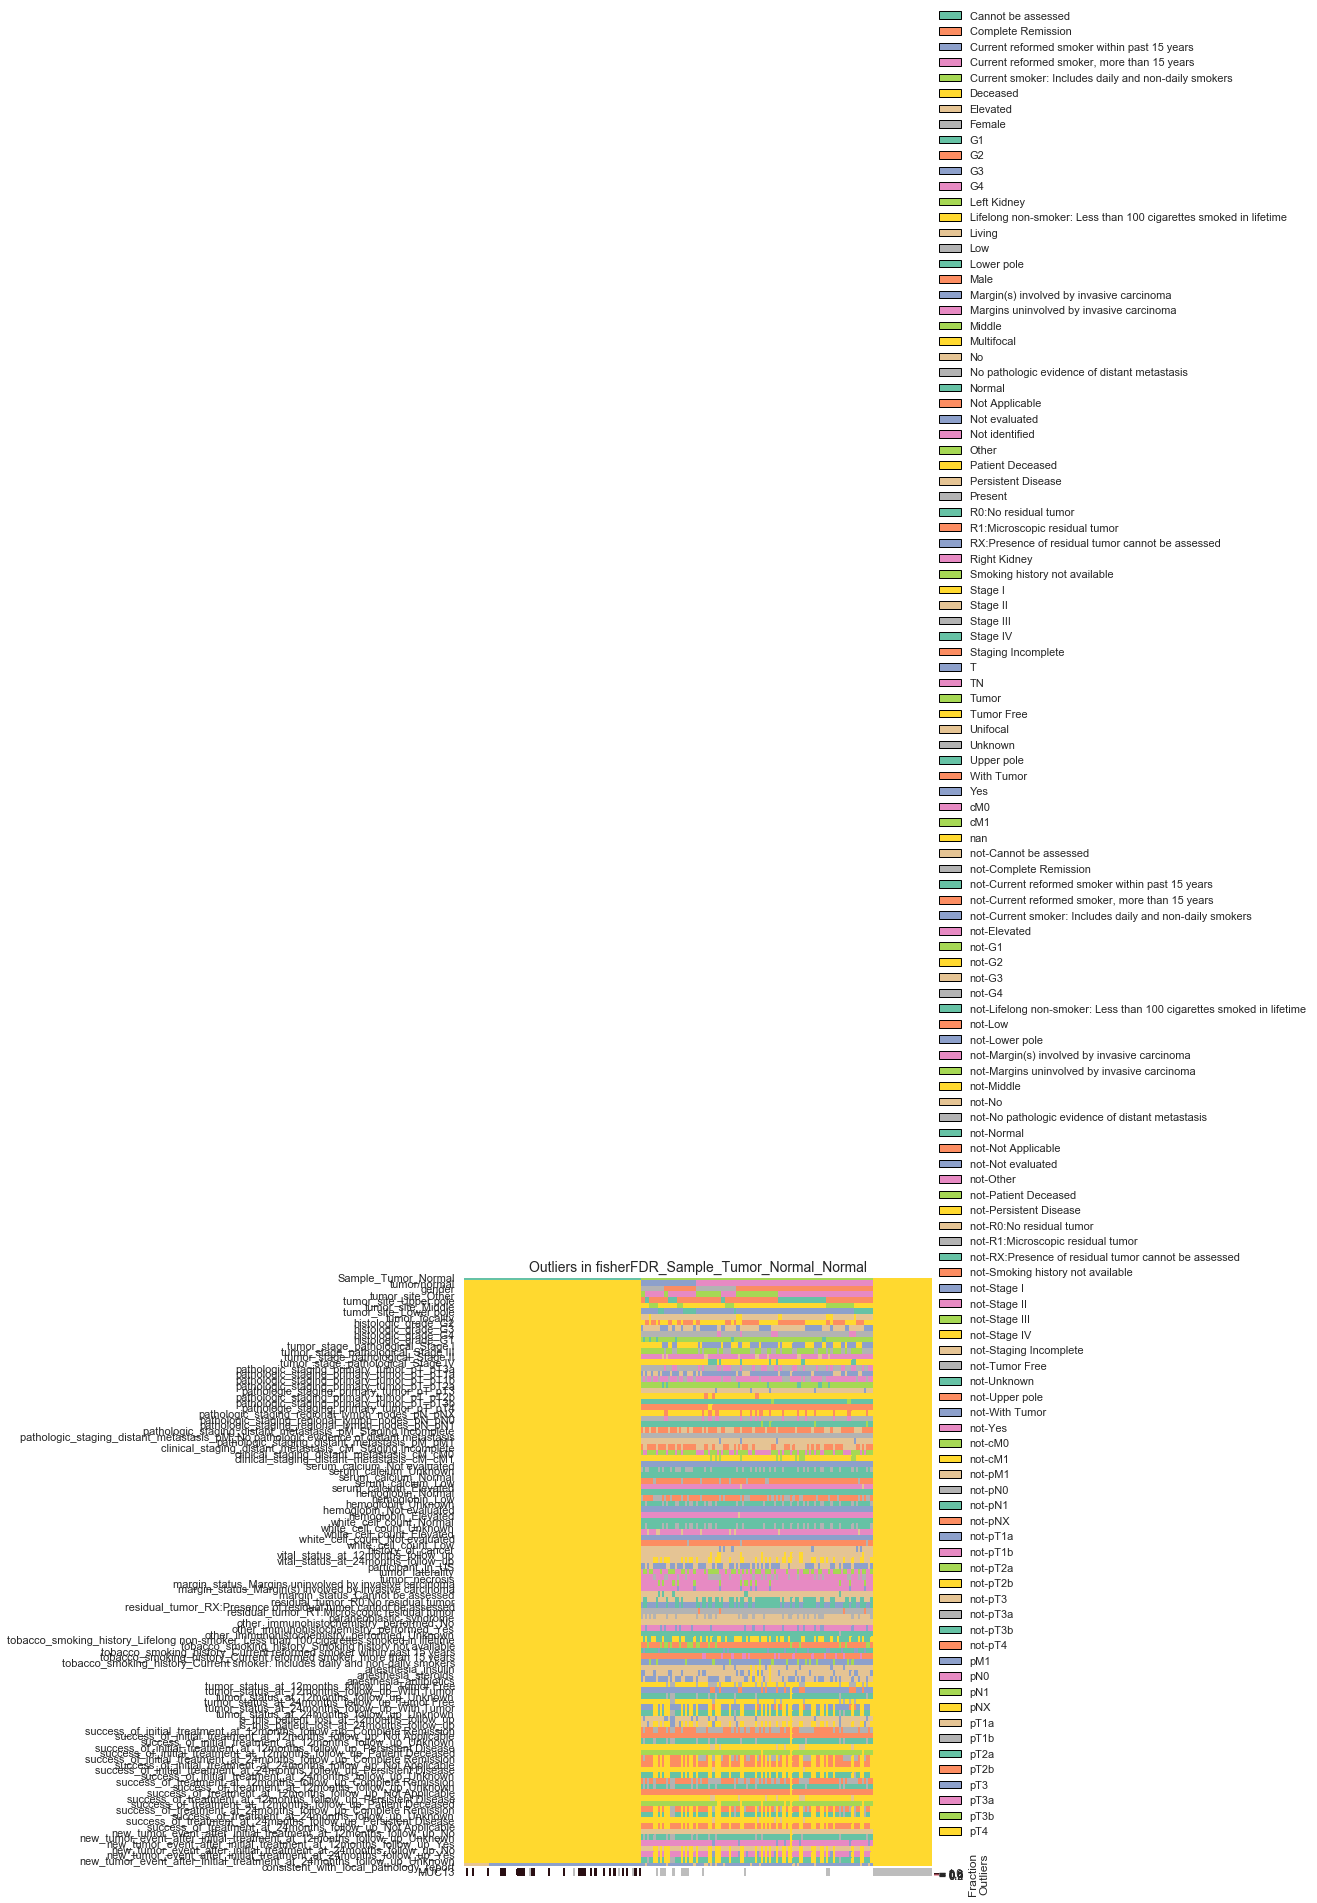

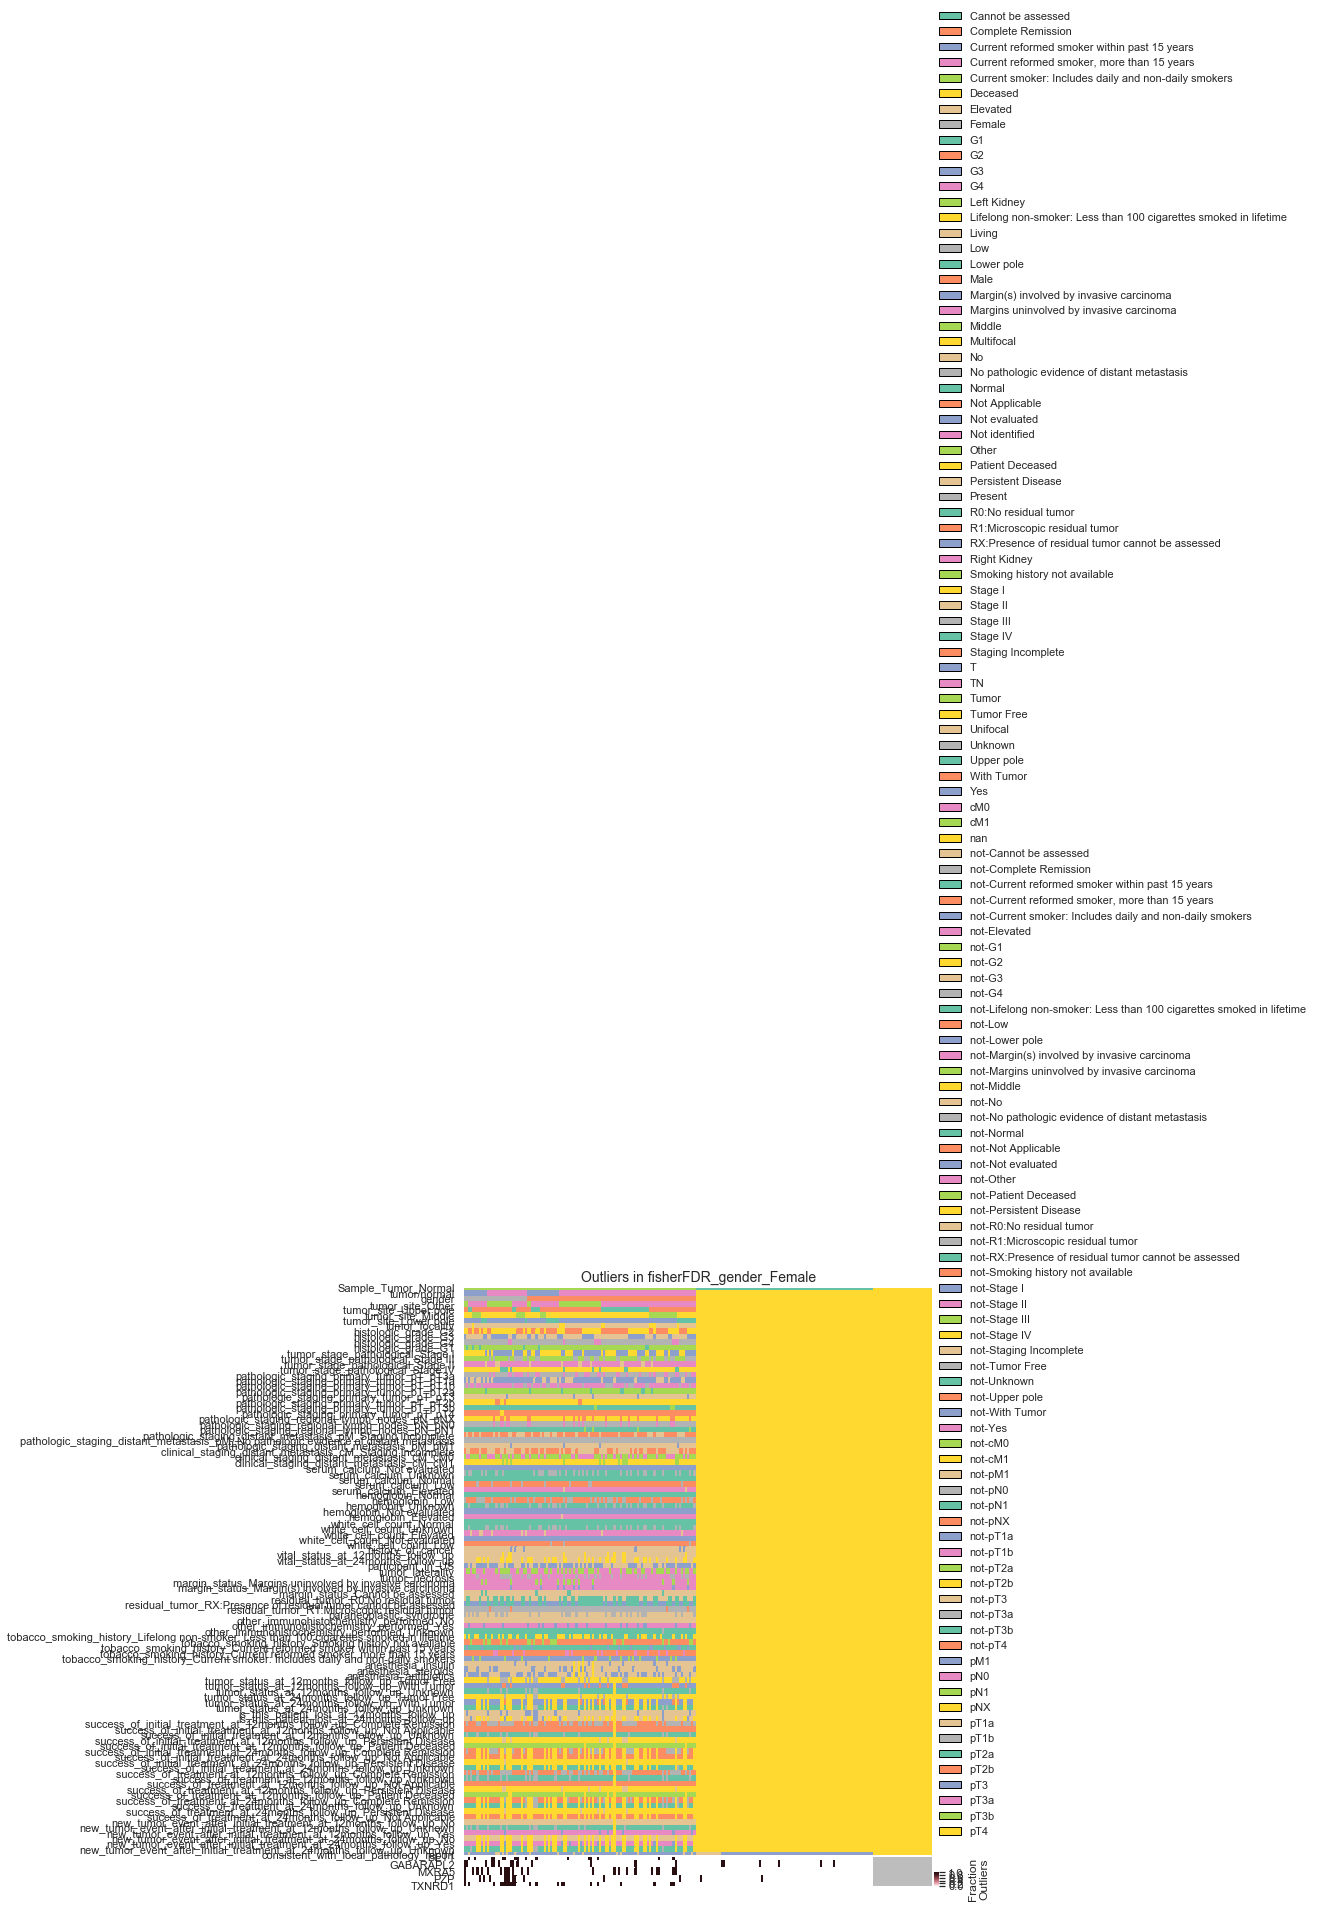

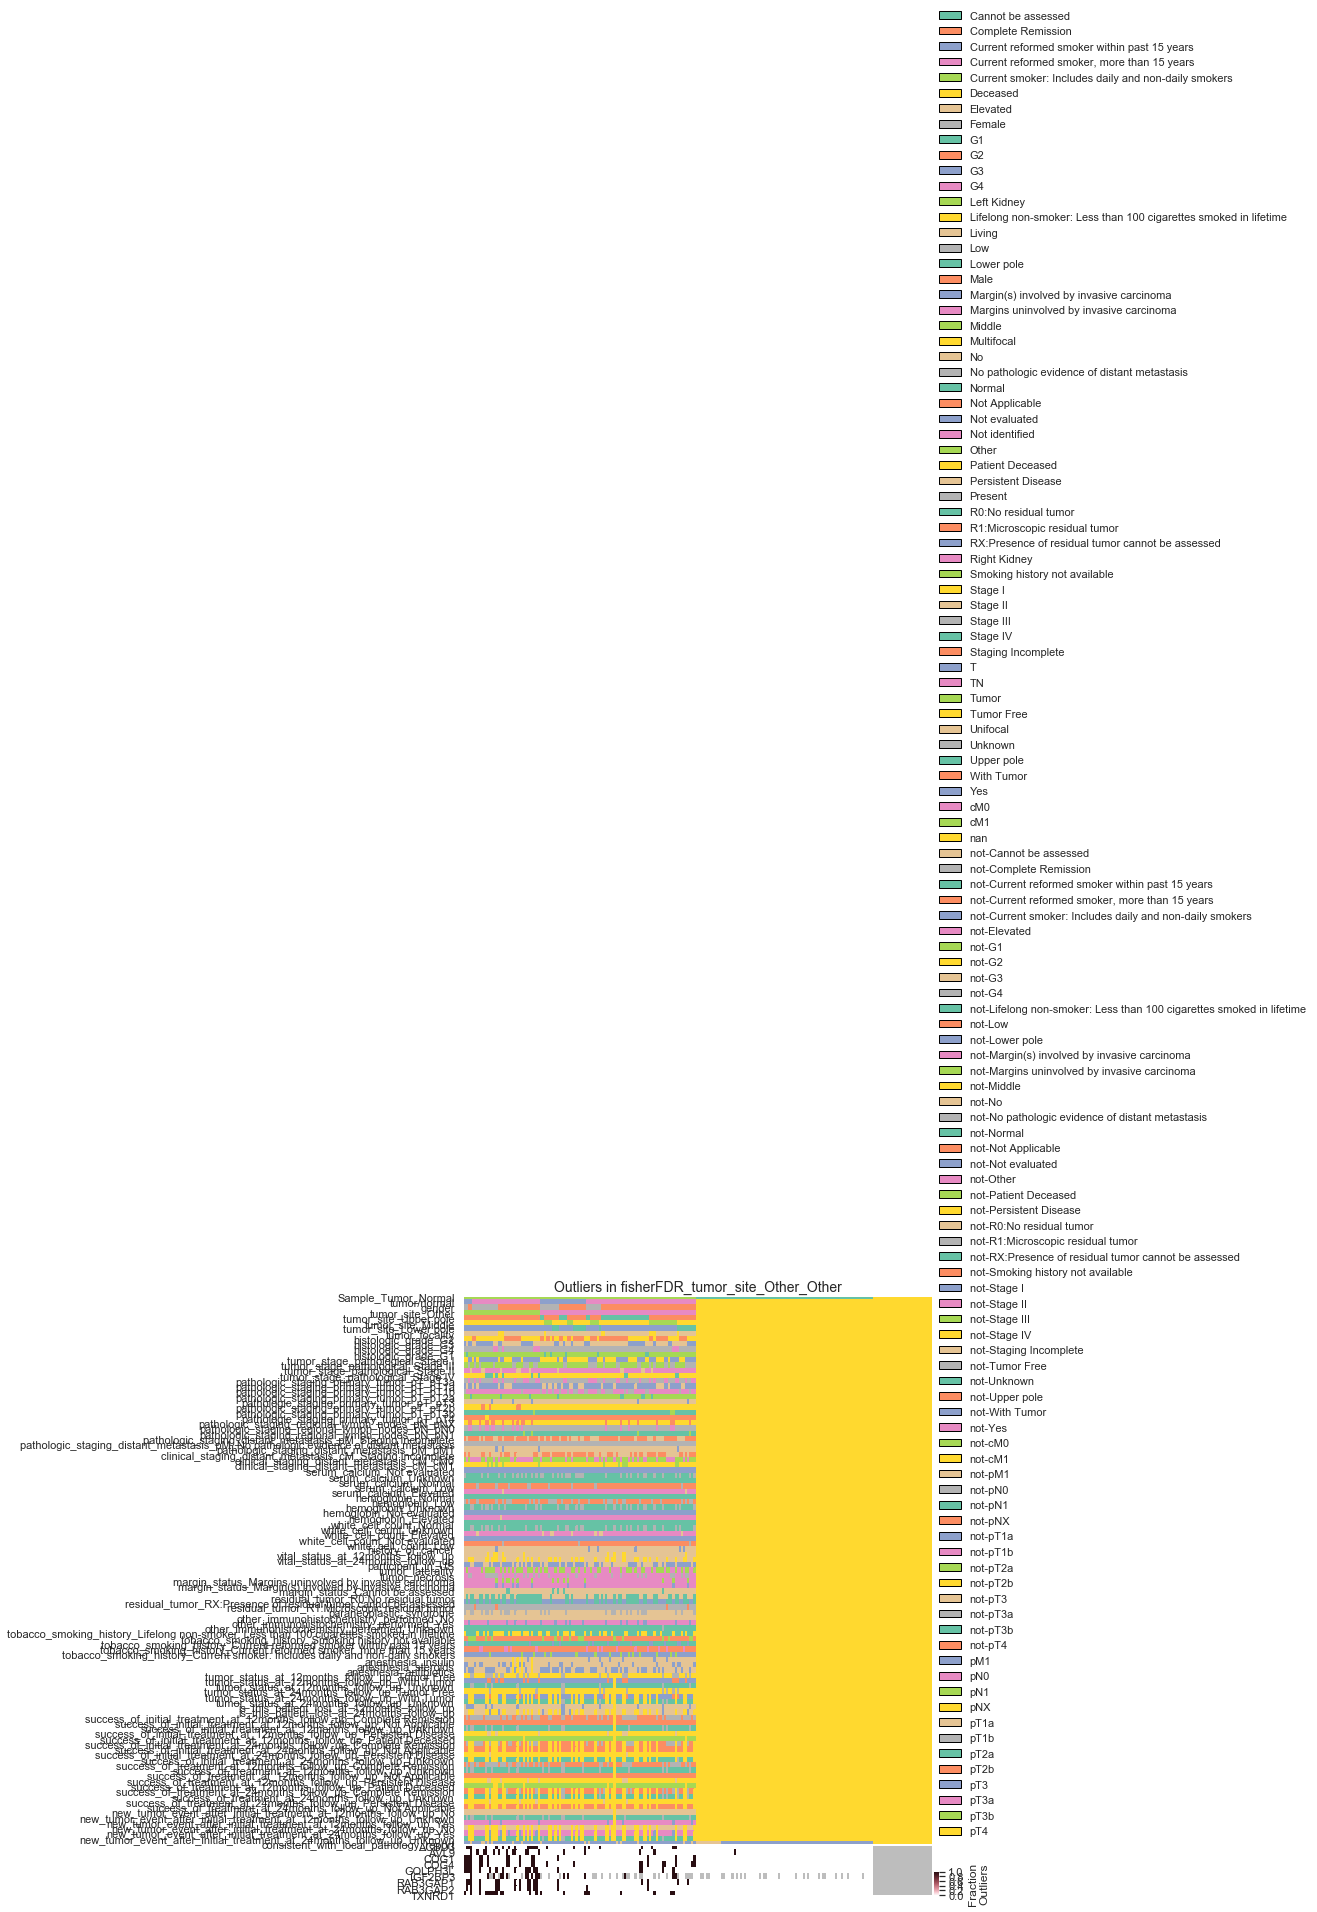

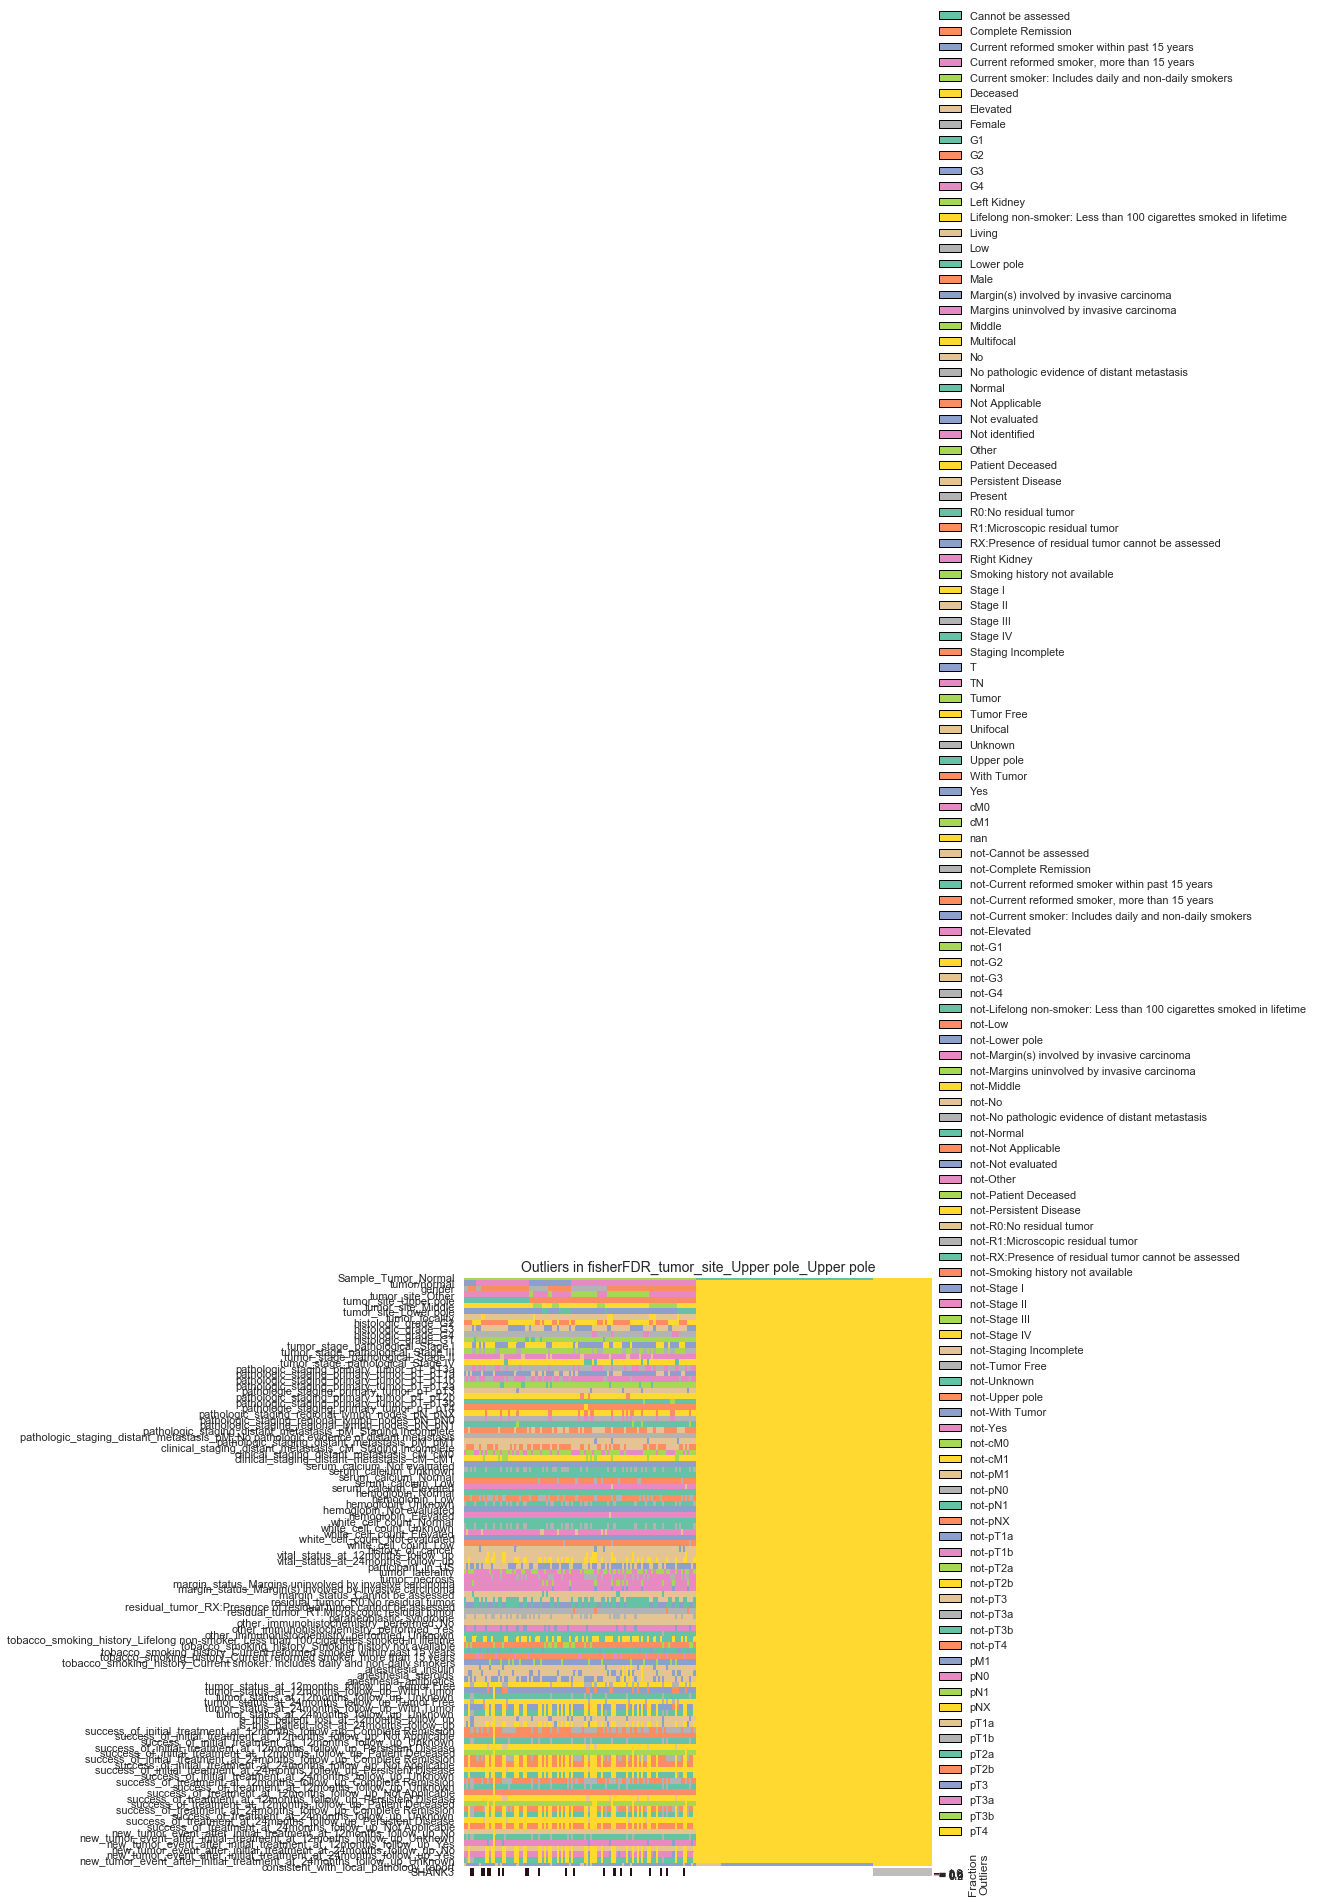

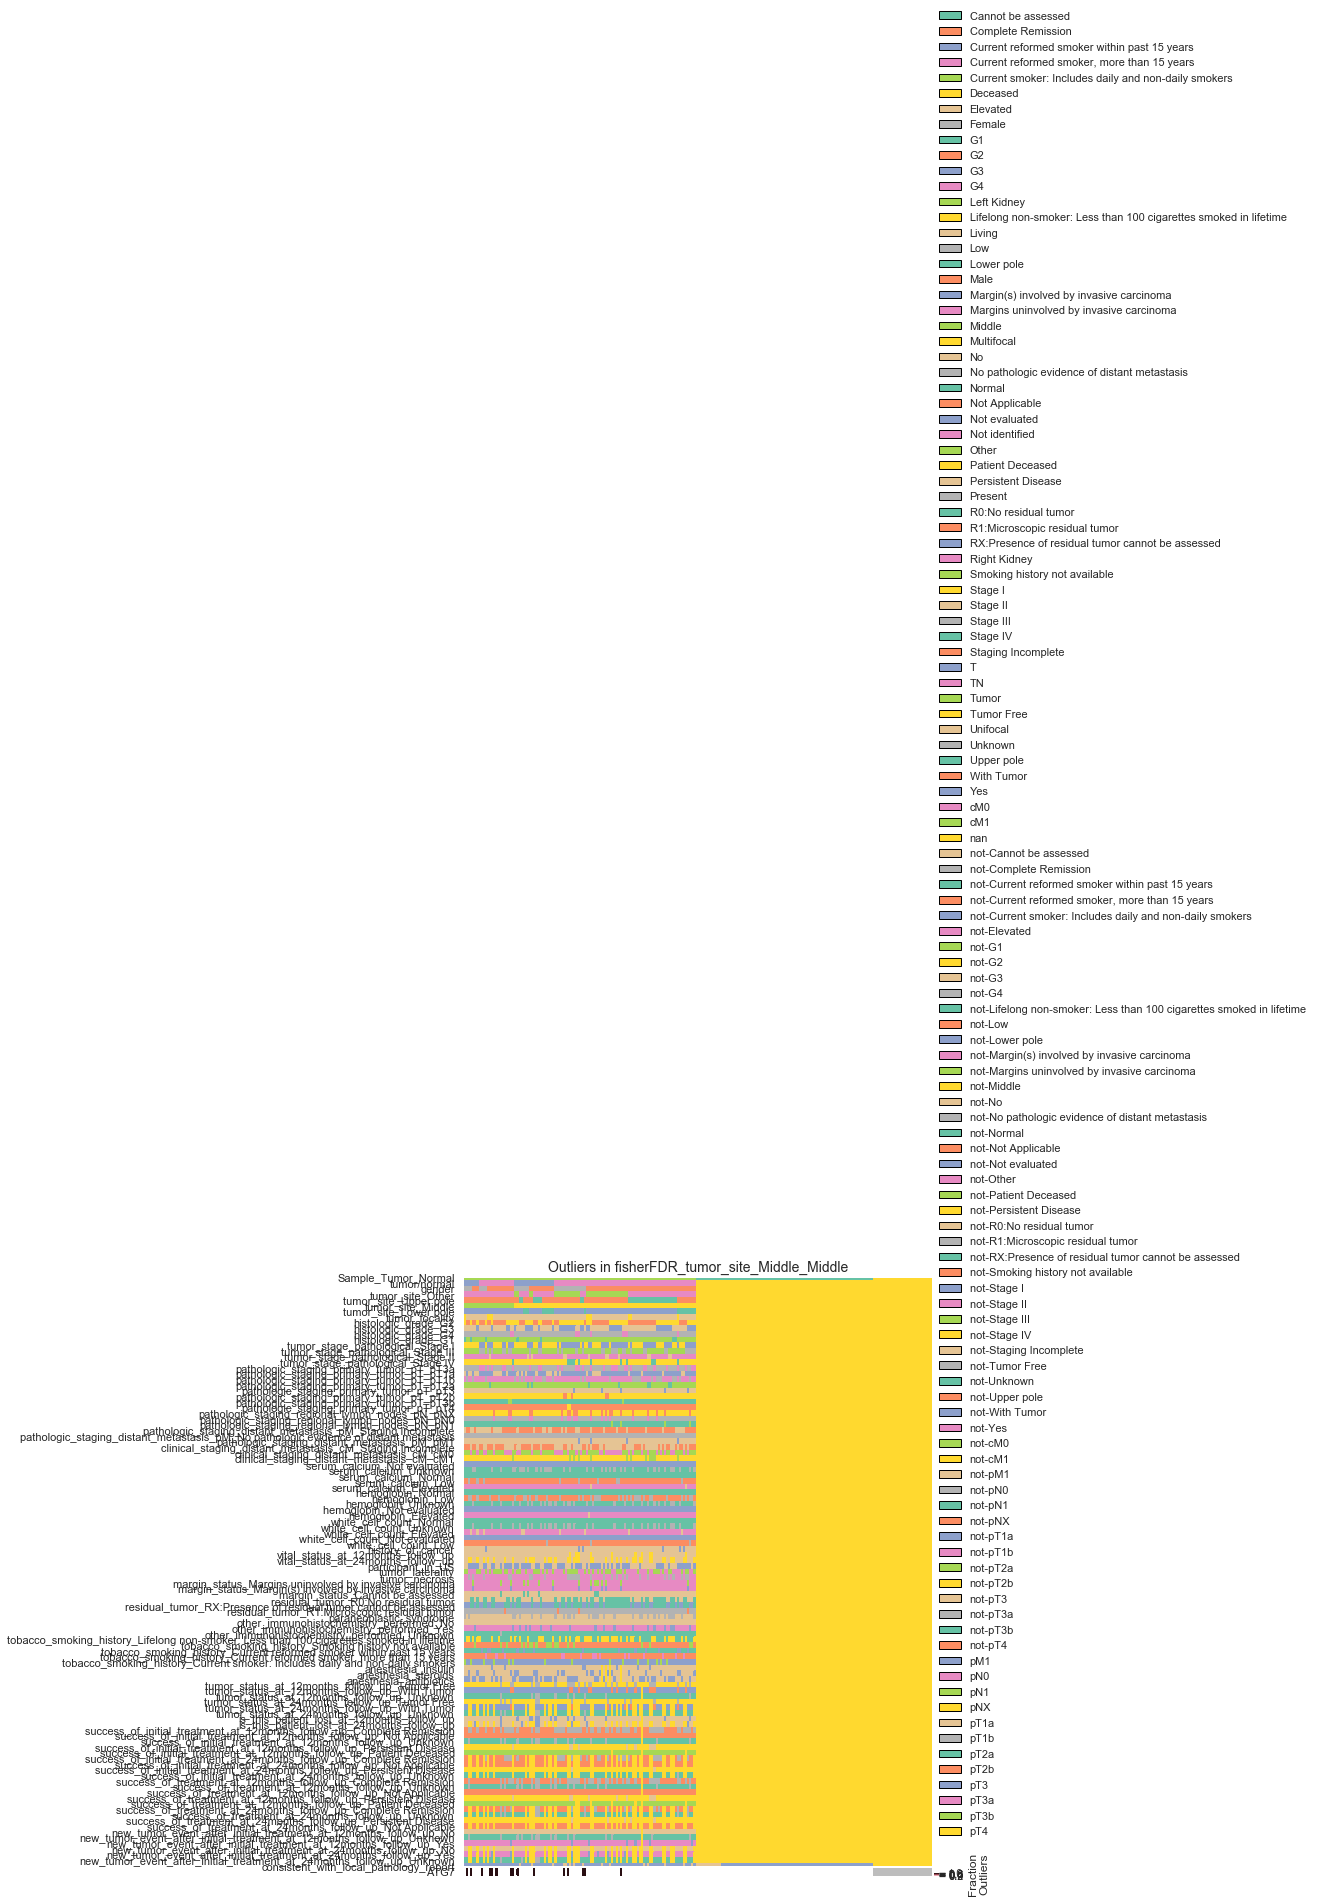

08/26/2019 13:48:37:WARNING:No significant genes at FDR 0.05 in fisherFDR_tumor_site_Lower pole_Lower pole


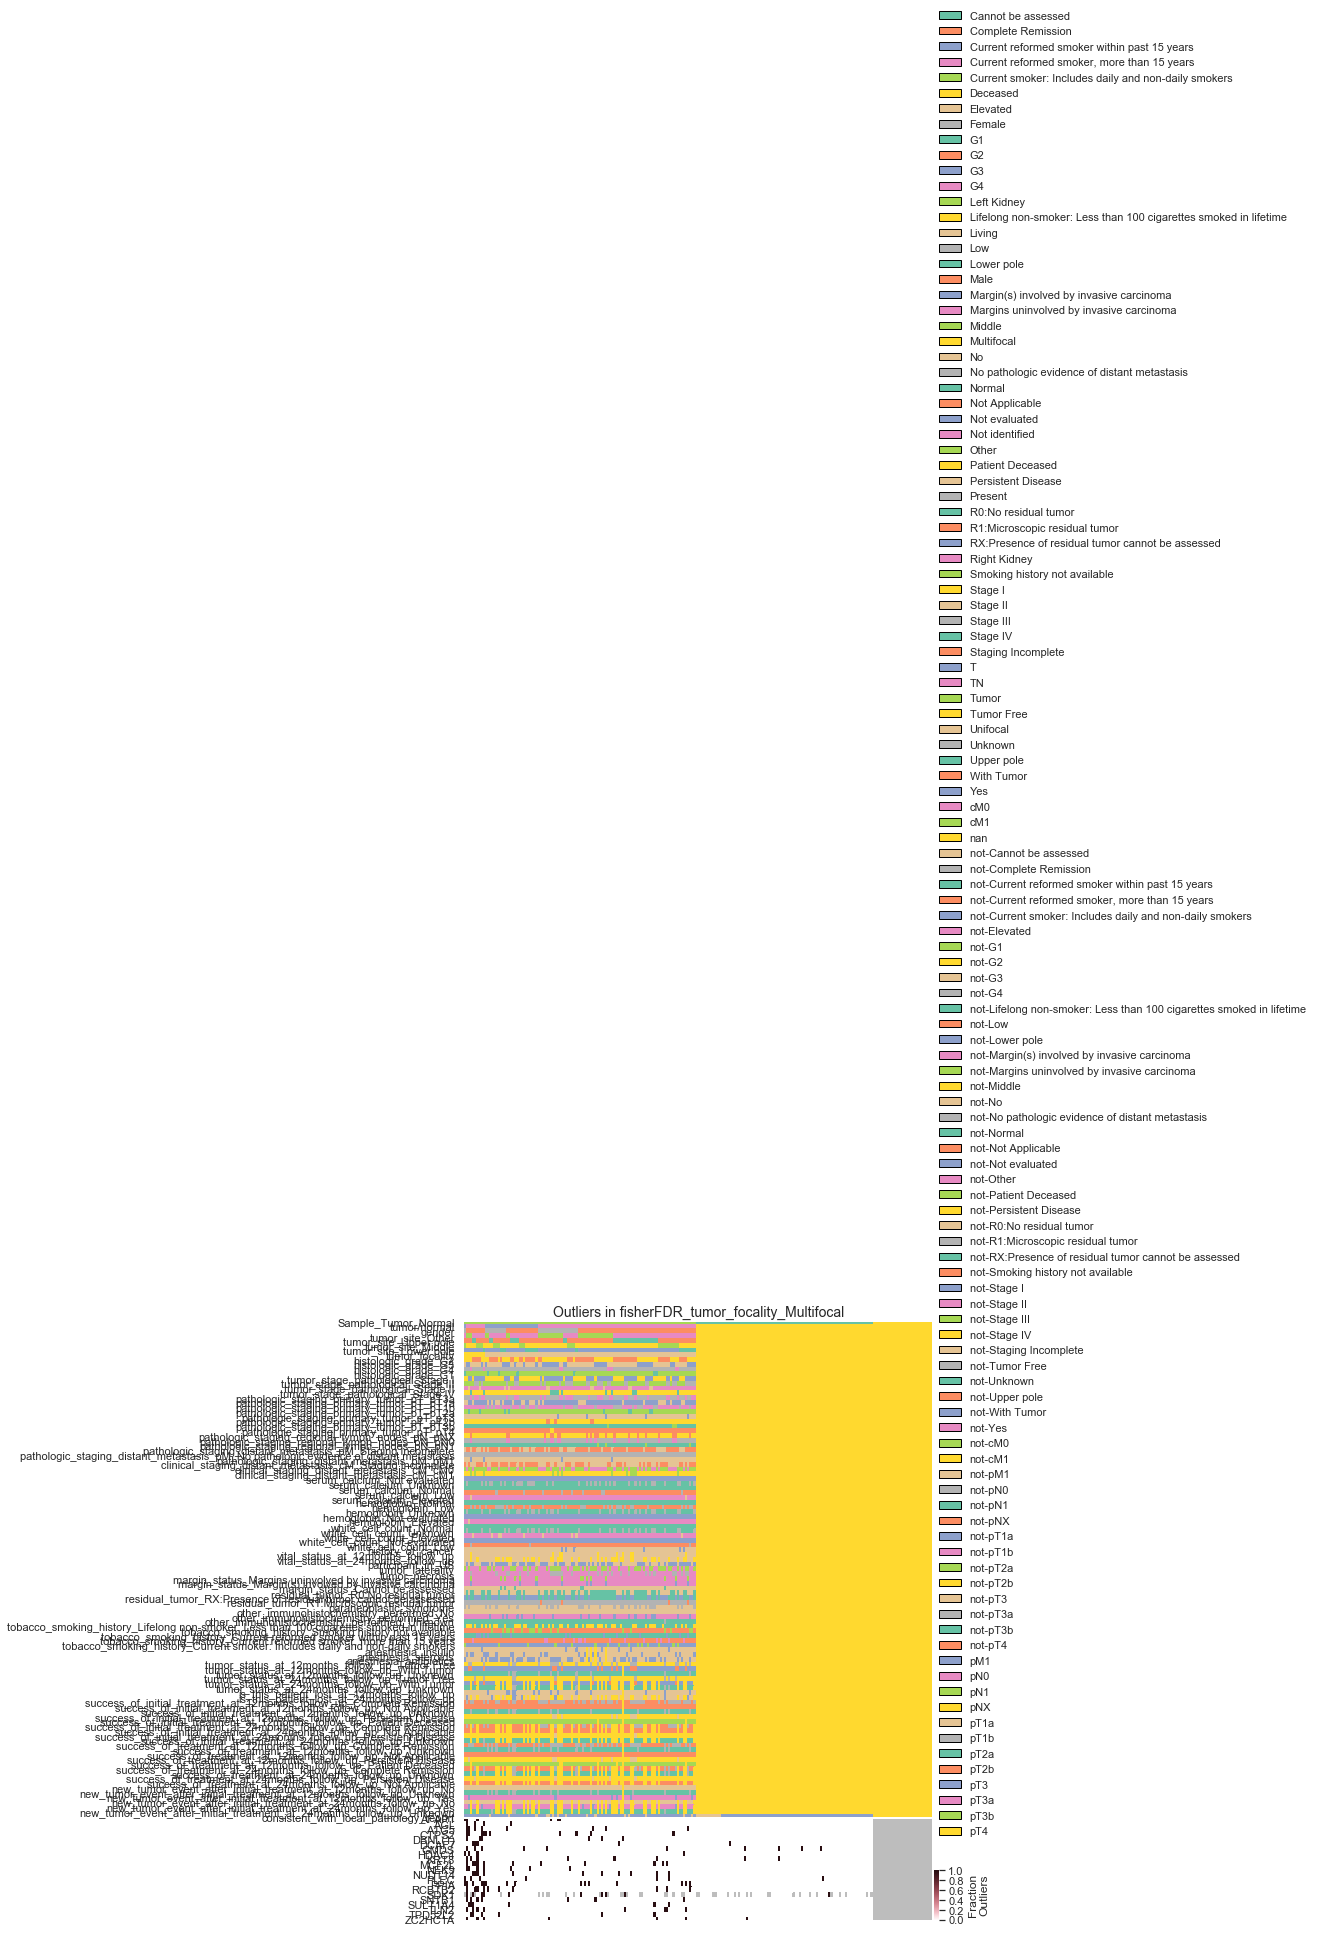

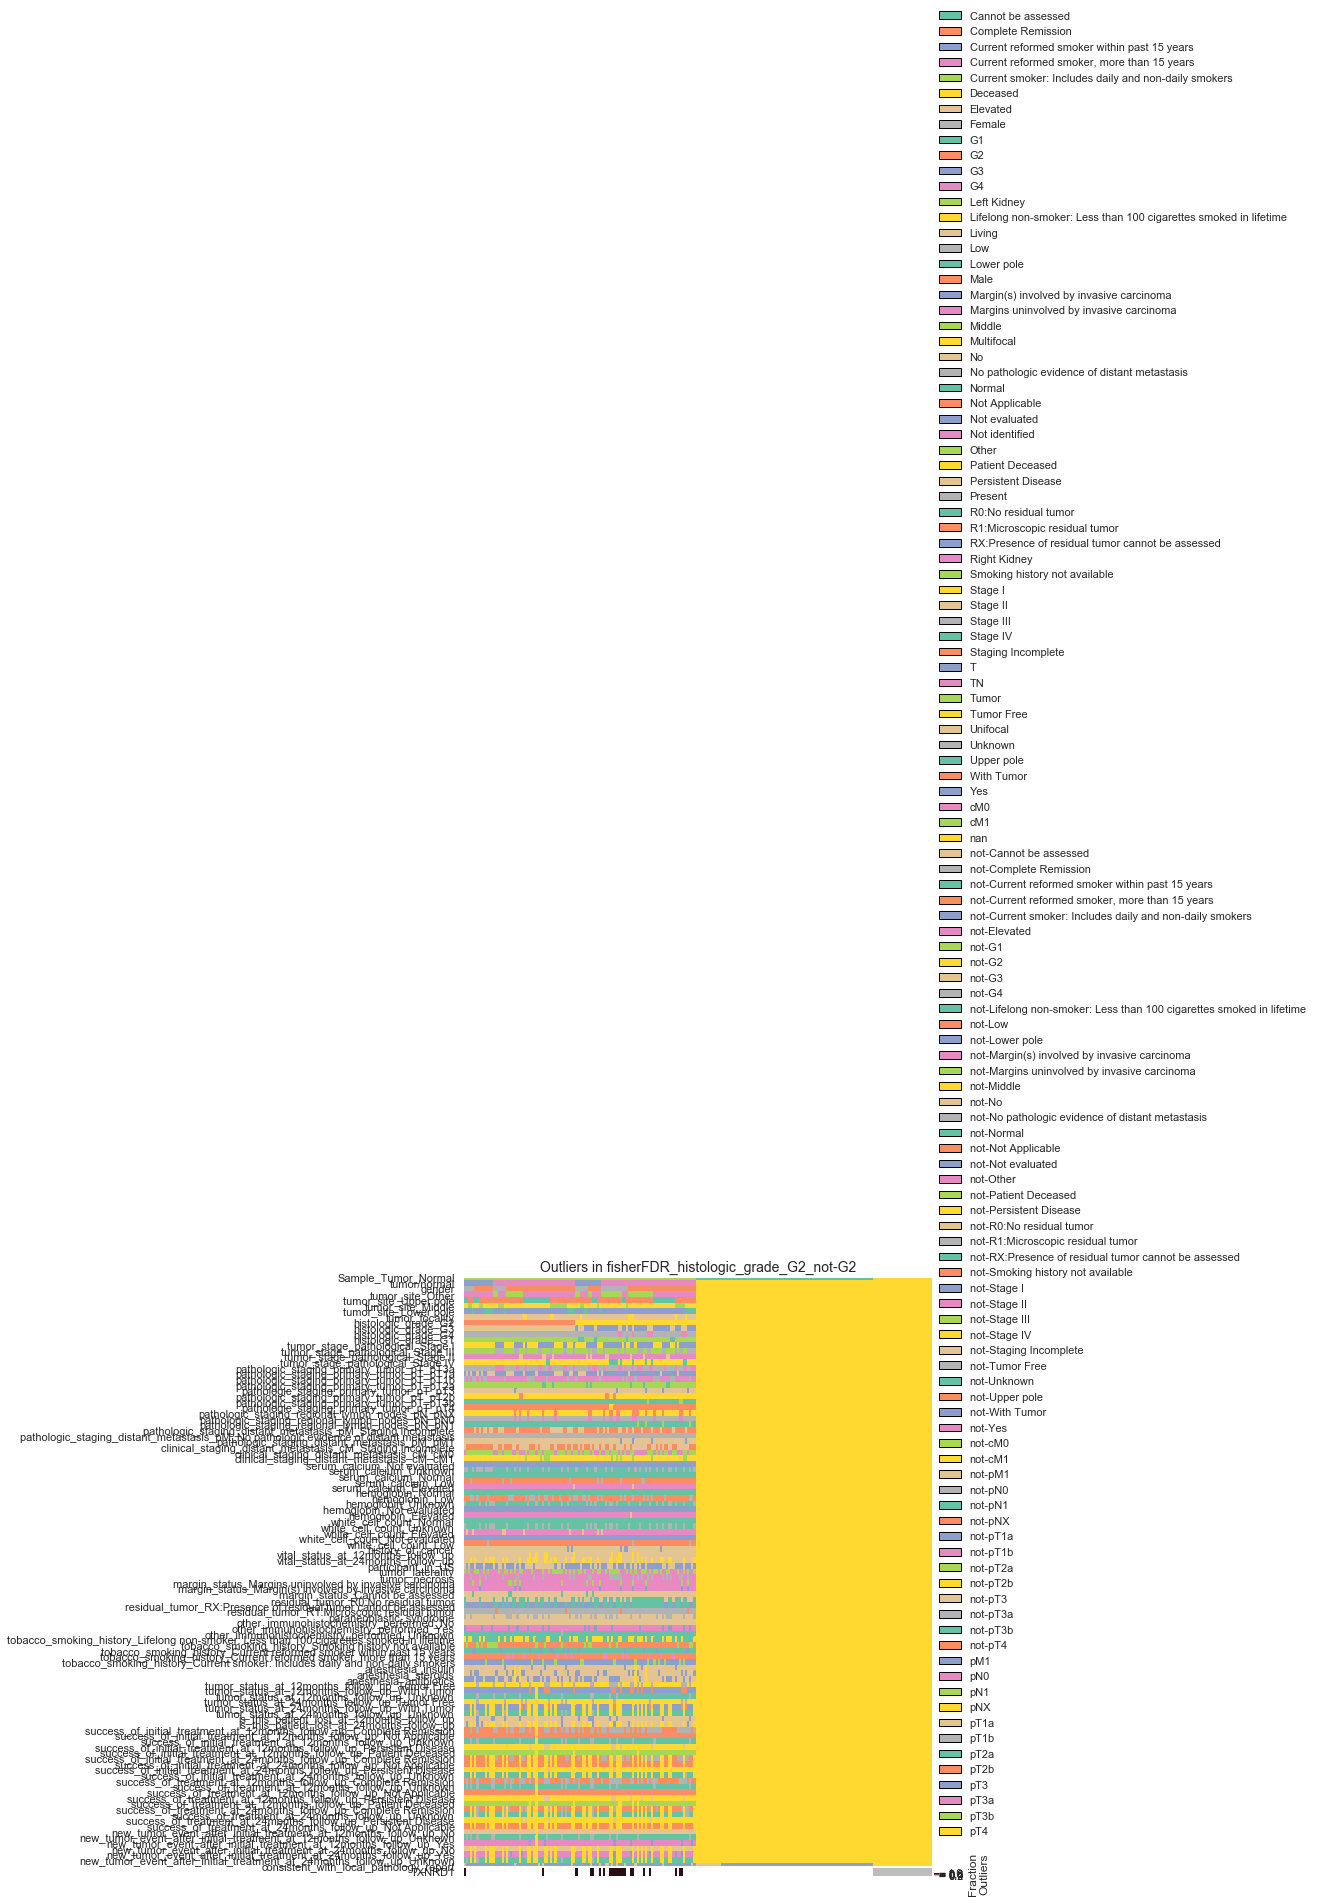

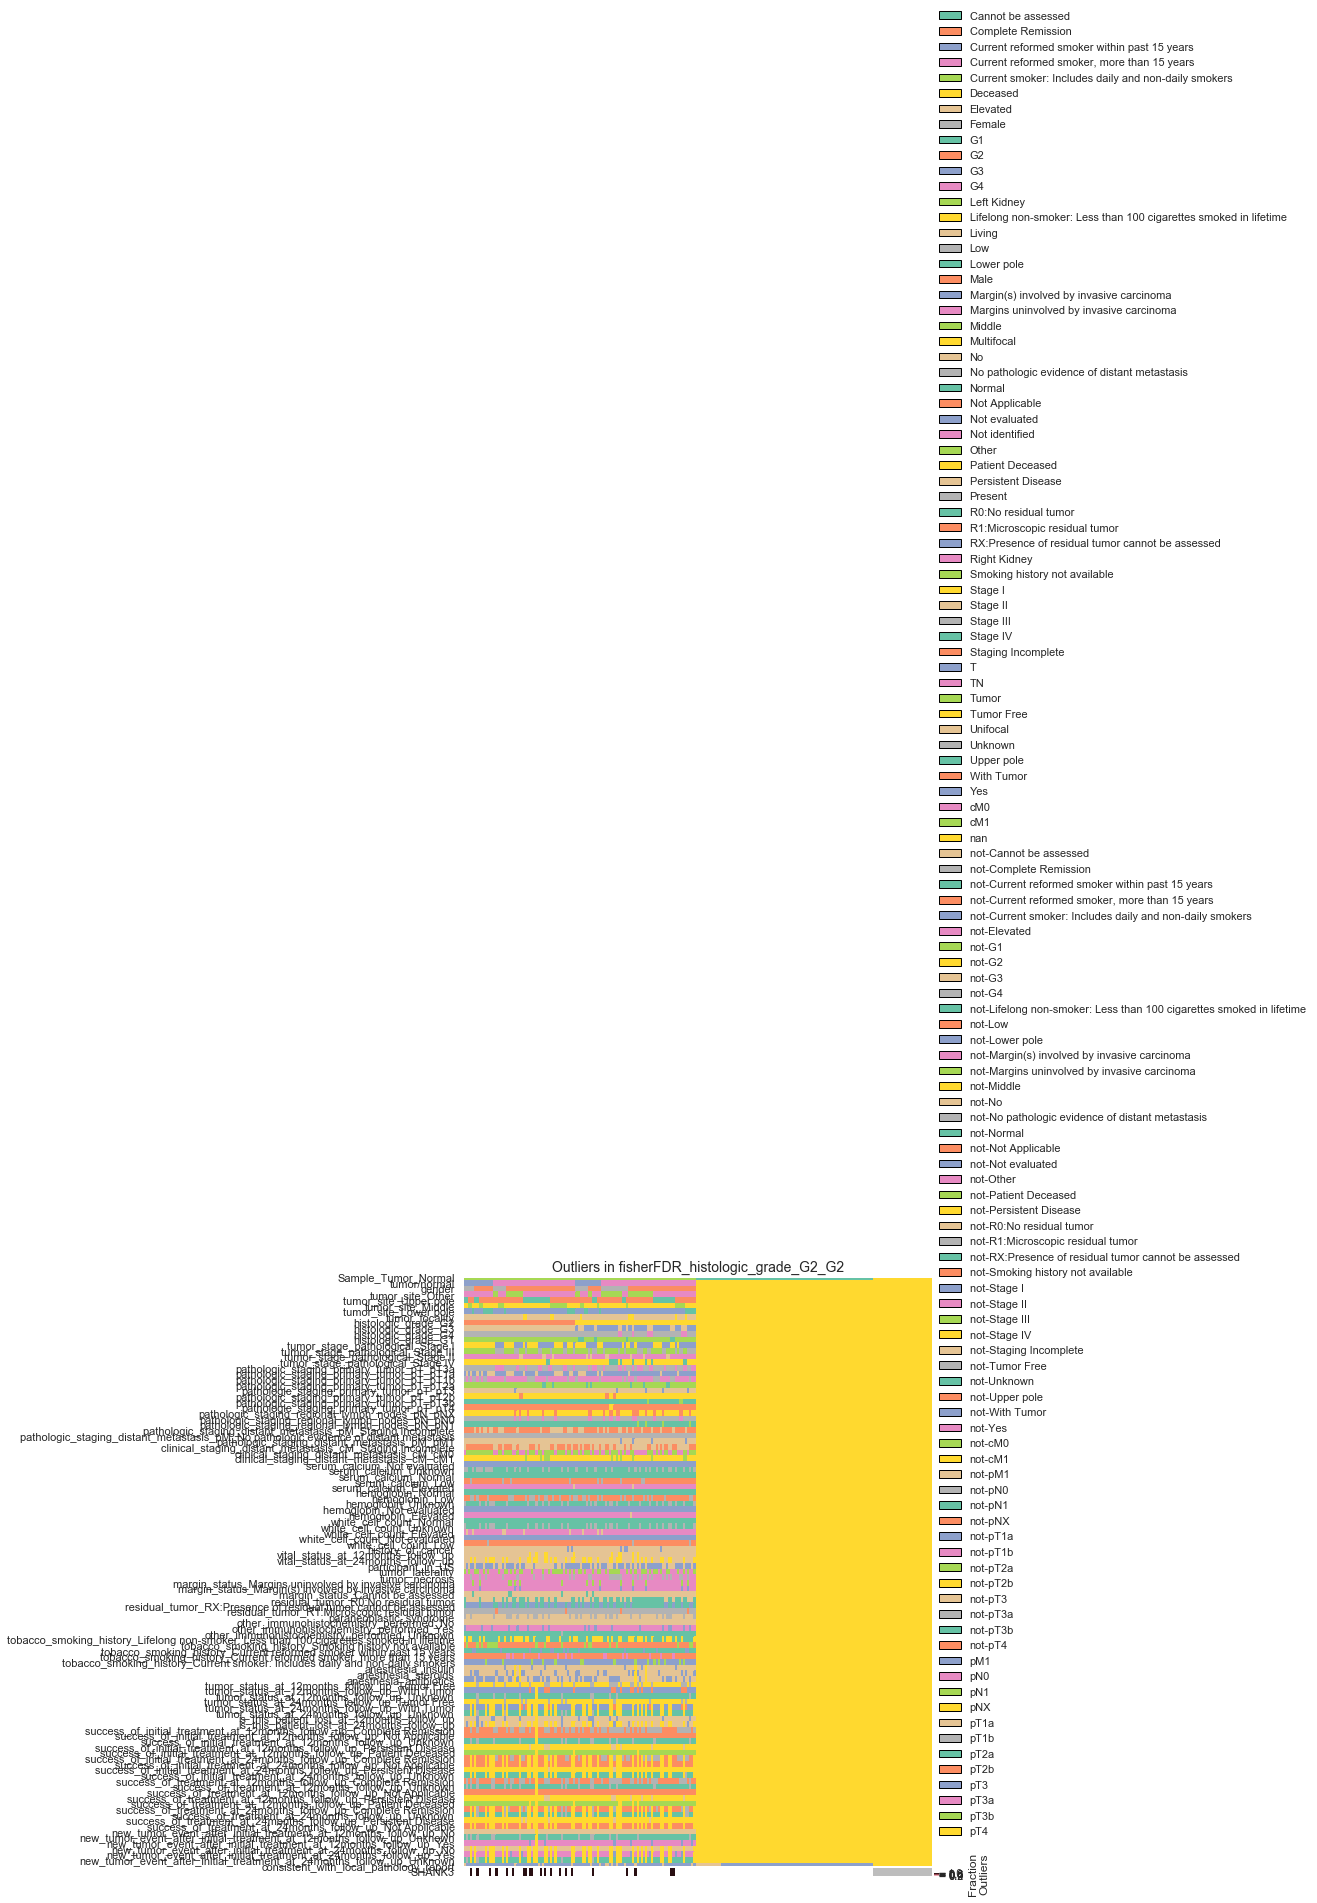

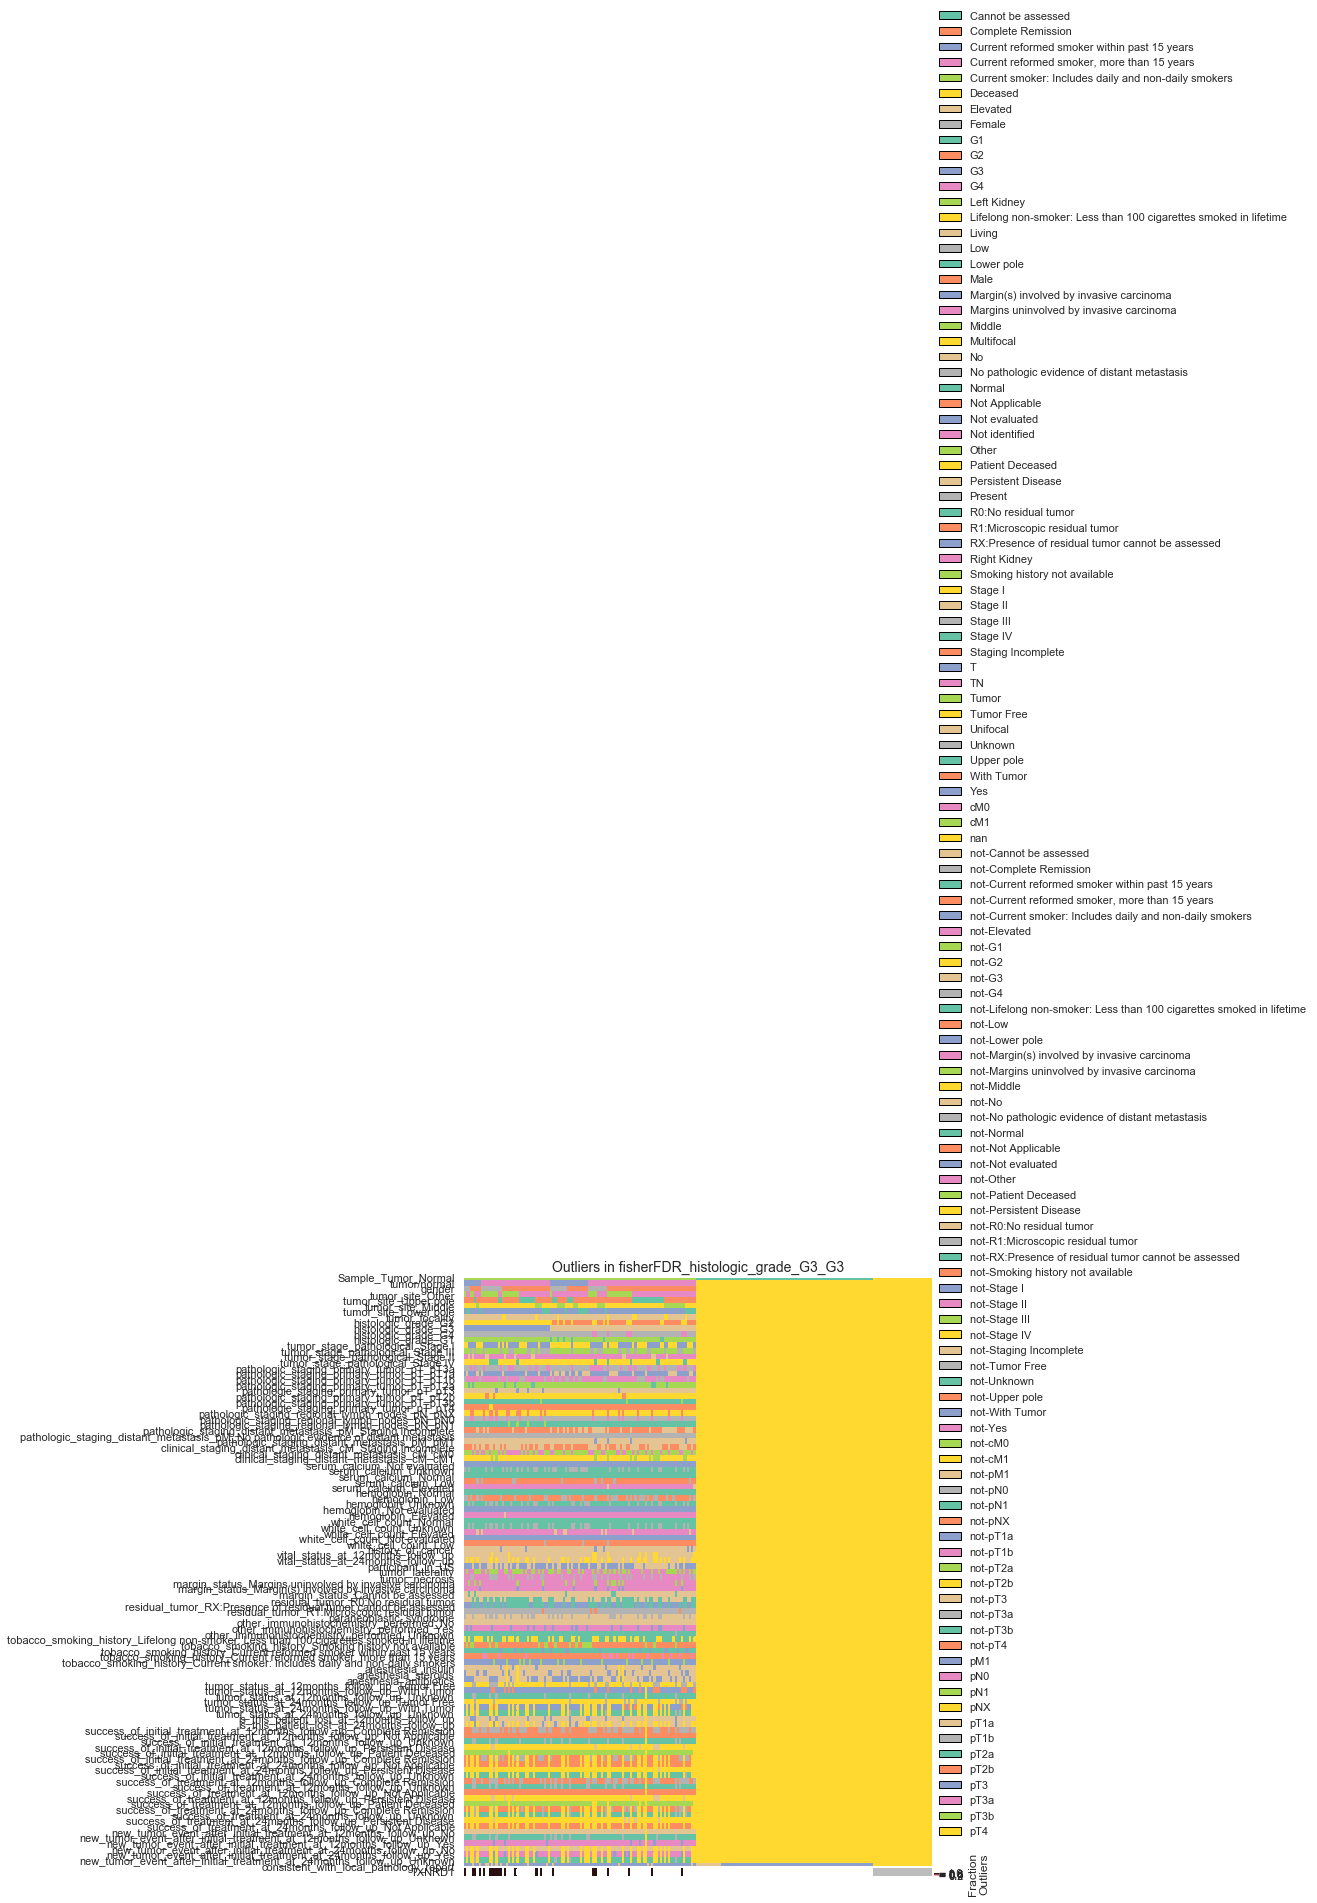

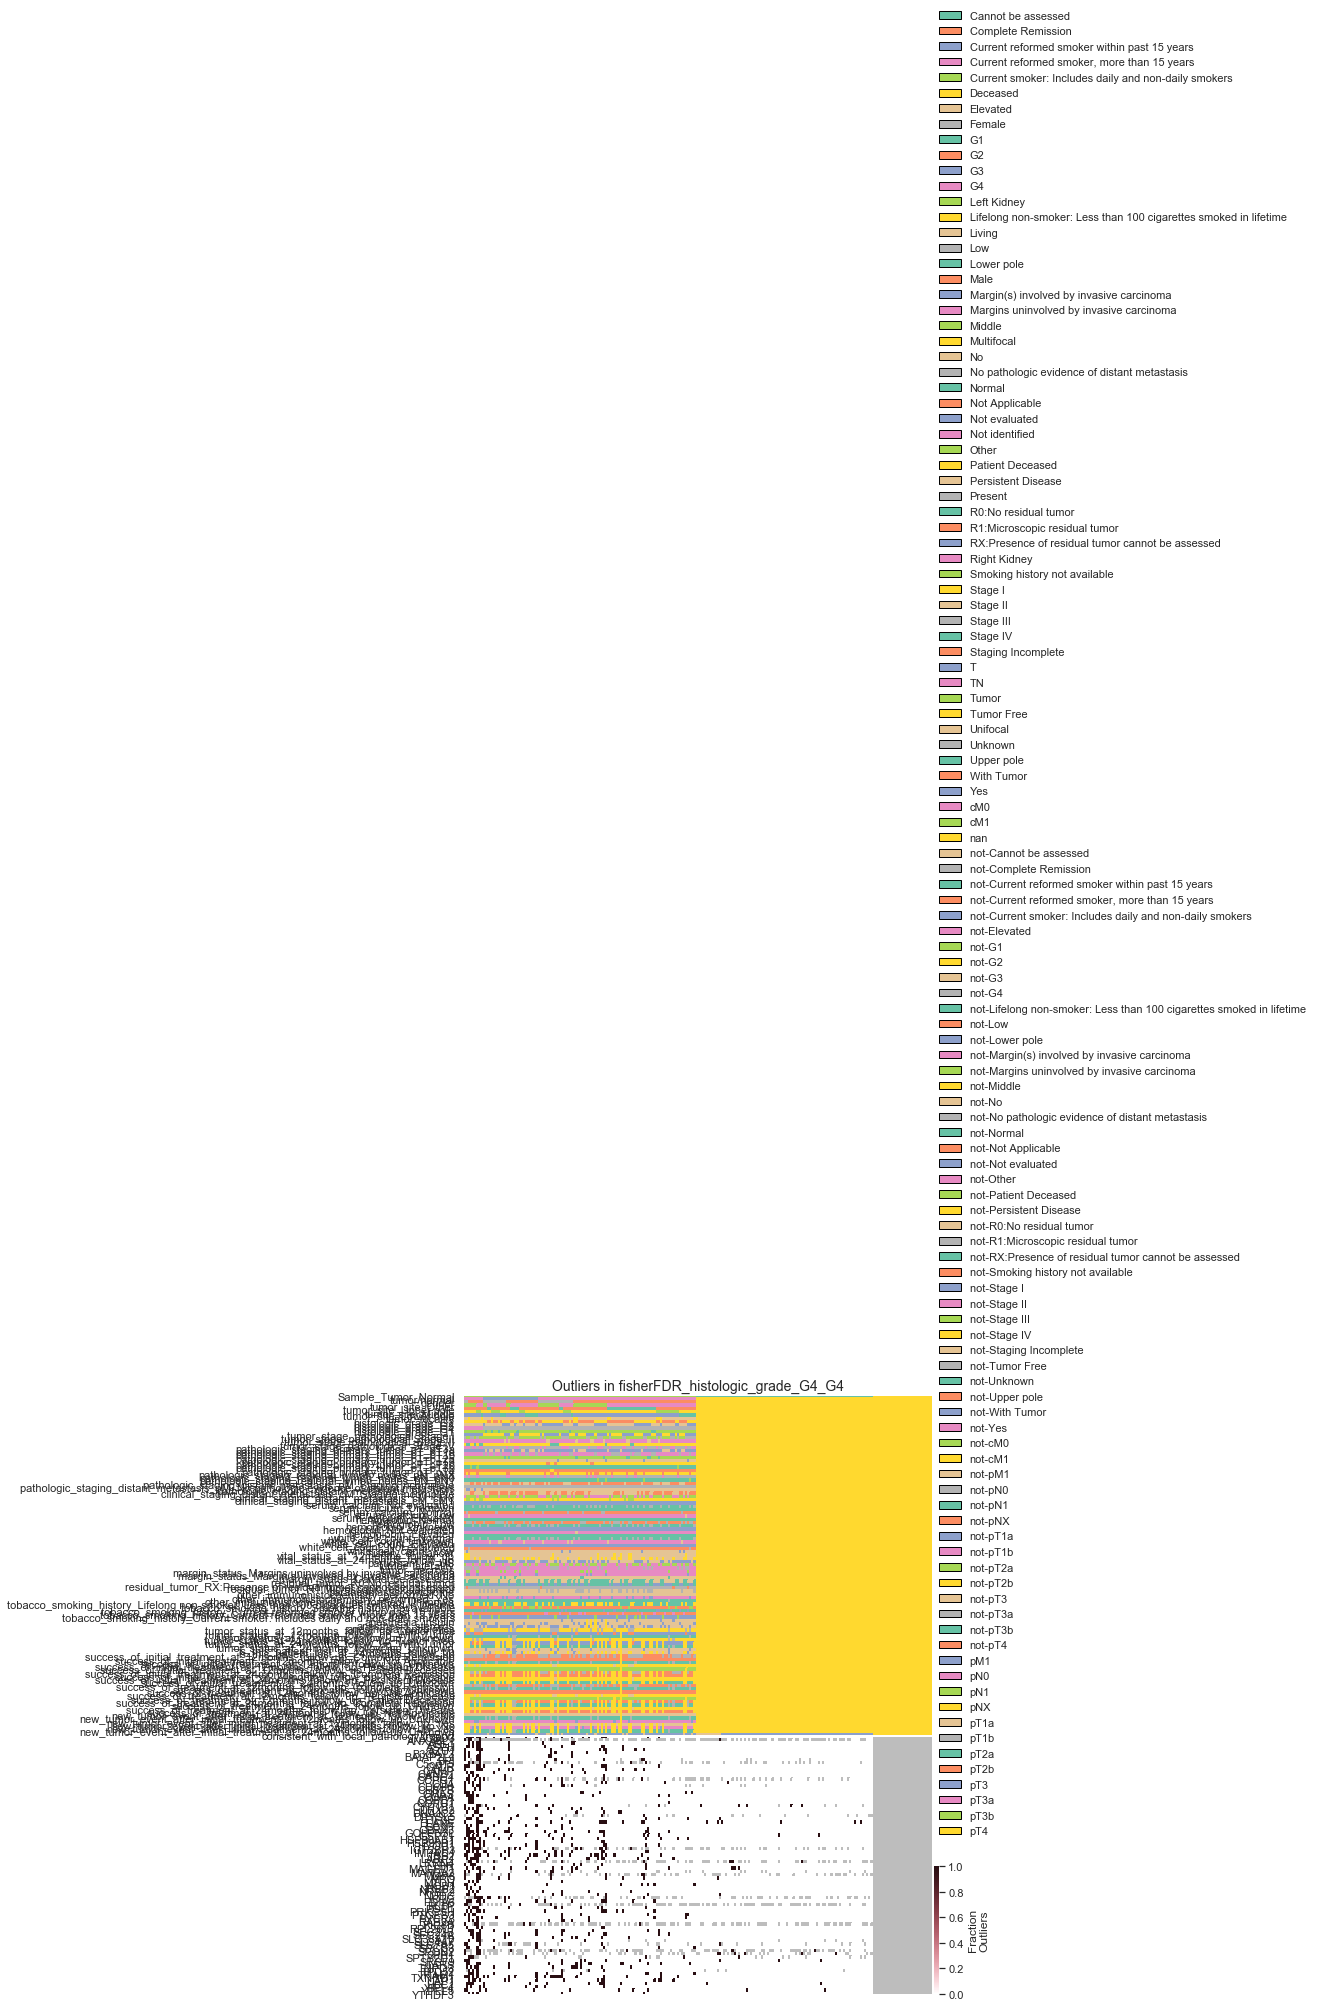

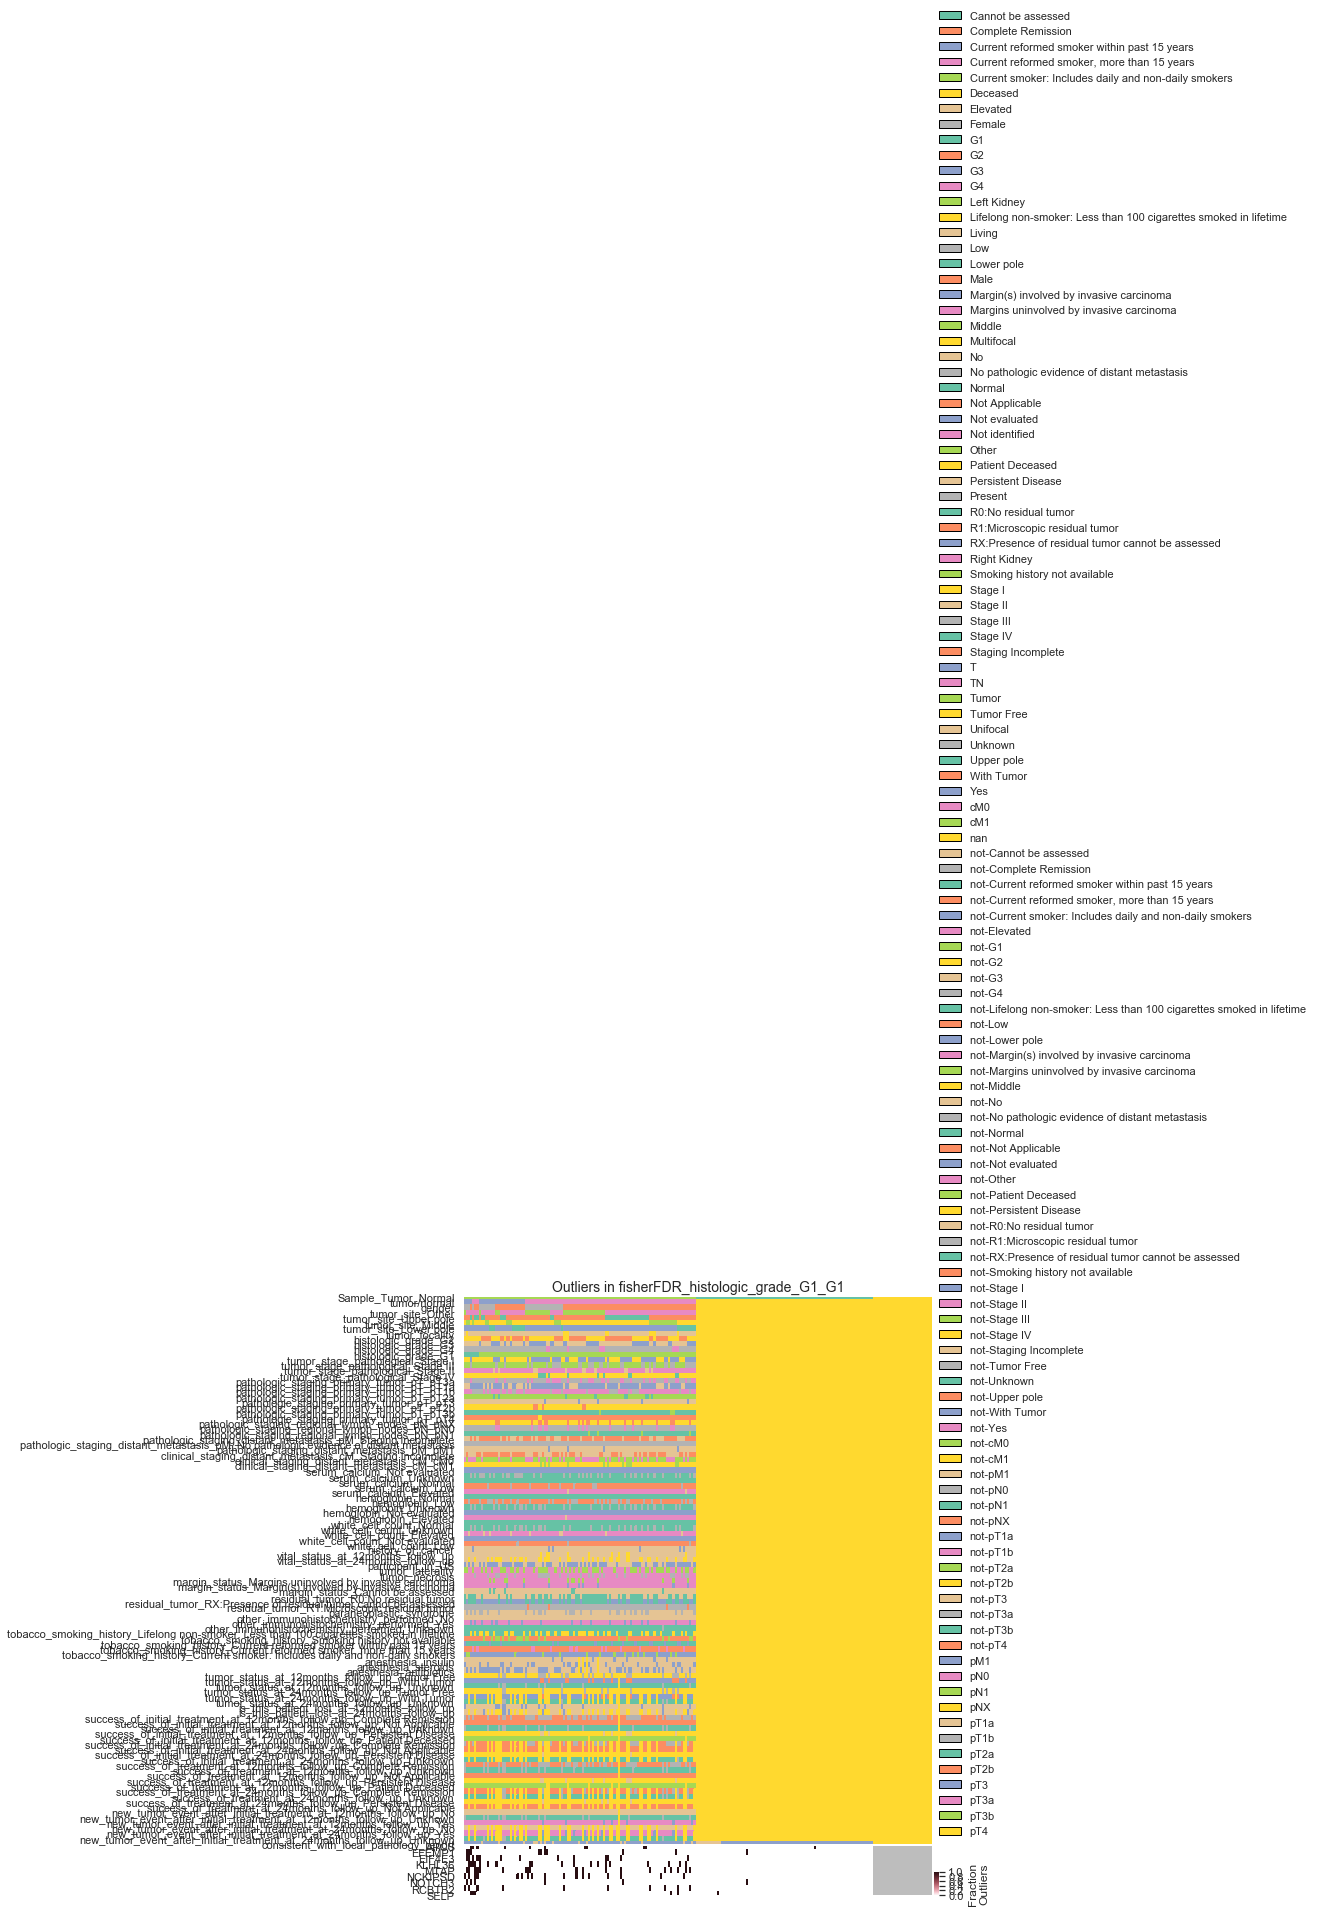

In [ ]:
# Pull out results
qvalues_table = qvalues.df
vis_table = outliers.frac_table

# Make heatmaps for significant genes
for col in qvalues_table.columns:
    deva.plot_heatmap(
        annotations=annotations, 
        qvals=qvalues_table,
        col_of_interest=col, 
        vis_table=vis_table)
    
    plt.show()
    plt.close()